# Lab Segmentation 1

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

[[110. 110. 111. ... 132. 132. 132.]
 [110. 110. 111. ... 132. 132. 132.]
 [111. 110. 111. ... 132. 132. 132.]
 ...
 [120. 118. 119. ... 139. 140. 145.]
 [121. 118. 118. ... 136. 137. 141.]
 [121. 118. 118. ... 133. 132. 136.]]


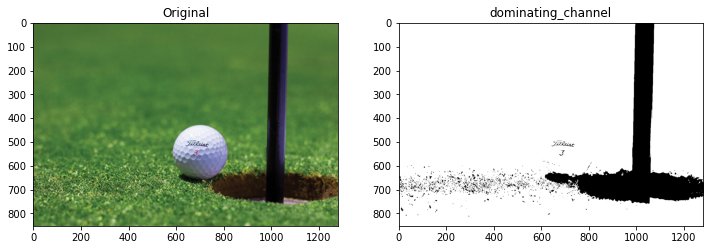

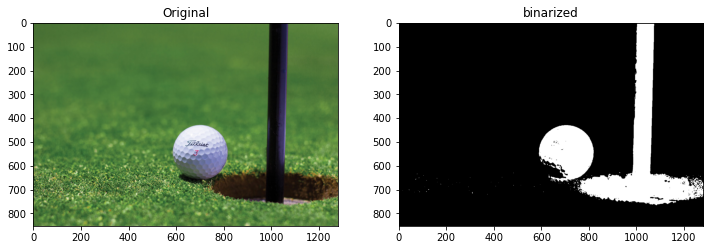

In [2]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('imgs/exp1/golf.jpeg')
original = img.copy()




# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
img = img.astype(float)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]



# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
#green

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
threshold=90
print(g)
dominating_channel = g > threshold

show_images([original, dominating_channel], ["Original", "dominating_channel"])


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
threshold=10
binarized=np.ones(img.shape)
g_dom = 2 * g - (r + b) > threshold
r_dom = 2 * r - (b + g) > threshold
b_dom = 2 * b - (r + g) > threshold
g_sum = np.sum(g_dom)
r_sum = np.sum(r_dom)
b_sum = np.sum(b_dom)

m = max(g_sum, r_sum, b_sum)
if m == g_sum :
    binarized[g_dom]=0
elif m == b_sum :
    binarized[b_dom]=0
else:
     binarized[r_dom]=0



# 6- display the binarized image

show_images([original, binarized], ["Original", "binarized"])




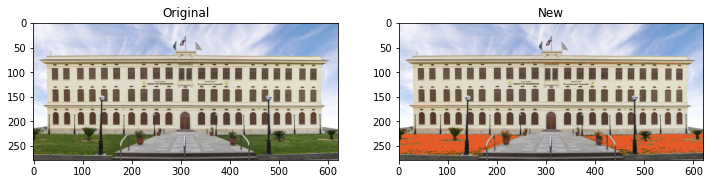

In [3]:
# 1- Get the required RGB color (Using a color picker)
#4c642a in hex
required_color = (76,100,42)


# 2- Read image
img = io.imread('imgs/exp2/cufe.png')
original = img.copy()

# 3- extract R, G and B channels (as float)
img = img.astype(float)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
difference_r = abs(required_color[0] - r)
difference_g = abs(required_color[1] - g)
difference_b = abs(required_color[2] - b)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
overall_distance= np.sqrt(difference_r ** 2 + difference_g ** 2 + difference_b** 2)


# 6-  create a mask by thresholding the differences
threshold=30
  # take it if difference is small :) 

mask = overall_distance < threshold

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
img[mask] = (230, 90, 40)
img = img.astype(int)
# 8- show the image or save it
show_images([original, img], ["Original", "New"])
